# Parser for the Wheel of Time Wiki

In [3]:
import string
import requests
import pandas as pd
from bs4 import BeautifulSoup

### Plan:
1. Iterate through sex category: Men, Women.
2. For each category iterate through alphabetic table of content
3. Take all the characters for corresponding latter
4. Parse character page and took all the data from summary table
5. Store it in dataframe

### 1. Iterate through sex category: Men, Women.

First, we have our starting url:

In [4]:
starting_url = 'https://wot.fandom.com/wiki/Category:People'

We want to obtain urls for each gender:

In [5]:
def give_sex(url, sex):
    "Return url for category (e.g. Sex)"
    return url[:-6] + sex

`give_sex()` take starting URL and return new URL for desirable category. We will use it for Men/Women:

In [6]:
w_url = give_sex(starting_url, 'Women') 
m_url = give_sex(starting_url, 'Men') 

In [7]:
w_url
m_url

'https://wot.fandom.com/wiki/Category:Women'

'https://wot.fandom.com/wiki/Category:Men'

For explanatory reasons we will use only "Men" category.

### 2. For each category iterate through alphabetic table of content

In [8]:
def get_alphabet():
    """
    Return list of Uppercase
    latters (ENG alphabet)
    """
    return list(string.ascii_uppercase)

we will use `get_alphabet()` for compiling URLs for each latter. It will worklike so:

In [9]:
for latter in get_alphabet():
    lat_url = m_url + f'?from={latter}'
    print(lat_url)

https://wot.fandom.com/wiki/Category:Men?from=A
https://wot.fandom.com/wiki/Category:Men?from=B
https://wot.fandom.com/wiki/Category:Men?from=C
https://wot.fandom.com/wiki/Category:Men?from=D
https://wot.fandom.com/wiki/Category:Men?from=E
https://wot.fandom.com/wiki/Category:Men?from=F
https://wot.fandom.com/wiki/Category:Men?from=G
https://wot.fandom.com/wiki/Category:Men?from=H
https://wot.fandom.com/wiki/Category:Men?from=I
https://wot.fandom.com/wiki/Category:Men?from=J
https://wot.fandom.com/wiki/Category:Men?from=K
https://wot.fandom.com/wiki/Category:Men?from=L
https://wot.fandom.com/wiki/Category:Men?from=M
https://wot.fandom.com/wiki/Category:Men?from=N
https://wot.fandom.com/wiki/Category:Men?from=O
https://wot.fandom.com/wiki/Category:Men?from=P
https://wot.fandom.com/wiki/Category:Men?from=Q
https://wot.fandom.com/wiki/Category:Men?from=R
https://wot.fandom.com/wiki/Category:Men?from=S
https://wot.fandom.com/wiki/Category:Men?from=T
https://wot.fandom.com/wiki/Category:Men

### 3. Take all the characters for corresponding latter

In [10]:
def get_html(url):
    "Return html file as text"
    r = requests.get(url)
    return r.text

`get_html()` function take URL for latter and return html text as an output. It is pretty intuitive. Next function `get_all_characters_urls()` is need to be explained. Lets take a look at it:

In [23]:
def get_all_charcters_urls(lat_url):
    """
    Return list of character
    URLs for a latter
    """
    html = get_html(lat_url)
    base_url = lat_url.split('/wiki/')[0] # 'https://wot.fandom.com'
    soup = BeautifulSoup(html, 'html.parser')
    chars = soup.find('ul', class_="category-page__members-for-char")\
                .find_all('a', class_="category-page__member-link")
    return [base_url + a.get('href') for a in chars]

`get_all_charcters_urls()` do the following:
1. Obtain html for one latter
2. Generate base URL for subsequent use (generating URL for each character)
3. Create BeauterfulSoup object (we will discuss it below)
4. Parse it using specific list of actions (we will discuss it below)
5. Return list of character URLs

`BeautifulSoup` is the main working class. It initialize next level of abstraction on the html data that allows to use special functions that significantly simplify the whole process.

In [12]:
m_html = get_html('https://wot.fandom.com/wiki/Category:Men?from=A')
soup = BeautifulSoup(m_html, 'html.parser')

If you print soup object it will return html content:

<!DOCTYPE doctype html>

<html class="" dir="ltr" lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="width=device-width, user-scalable=yes" name="viewport">
<meta content="MediaWiki 1.19.24" name="generator"/>
<meta content="noindex,nofollow" name="robots"/>
<meta content="A Wheel of Time Wiki,wot,Category:Men" name="keywords"/>
<meta content="People who think with their muscles and the hairs on their chest." name="description"/>
<meta content="summary" name="twitter:card"/>
<meta content="@getfandom" name="twitter:site"/>
<meta content="https://wot.fandom.com/wiki/Category:Men" name="twitter:url"/>
<meta content="Category:Men | A Wheel of Time Wiki | Fandom" name="twitter:title"/>
<meta content="People who think with their muscles and the hairs on their chest." name="twitter:description"/>
<link href="https://vignette.wikia.nocookie.net/wot/images/b/bc/Wiki.png/revision/latest?cb=20091027070008" rel="apple-touch-icon" sizes="155x155"/>
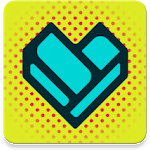
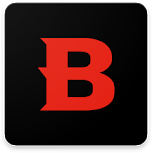

In [13]:
soup

But it is not just a plain text, it is `BeautefulSoup` class, thus it allows one to use some special functions. As an example:

1. ) `find()` - this method return the first entrance of a particular tag which was passed to the function
2. ) `find_all()` - this method return all entrances of a particular tag which was passed to the function

In order to illusrate `find()` and `find_all()` functionality, lets look at real-world example:

Go here https://wot.fandom.com/wiki/Category:Men?from=A. What do we want? We want to store URL for each latter. Move your coursor to `Abaldar Yulan` and make a right-click, choose "Inspect element". You will se similar picture:

![toitle](new_inspection.png)

First `<ul>` tag will give us first latter entrance at a page (only A). In order get rid of potential errors, we can specify some additional html tags, for example - `class`:

In [14]:
soup.find('ul', class_="category-page__members-for-char")

<ul class="category-page__members-for-char">
<li class="category-page__member">
<div class="category-page__member-left">
<a href="/wiki/Abaldar_Yulan" title="Abaldar Yulan">
<img alt="Abaldar Yulan" class="category-page__member-thumbnail lzy lzyPlcHld" data-src="https://vignette.wikia.nocookie.net/wot/images/4/46/Hawkwing.jpg/revision/latest/window-crop/width/40/x-offset/2/y-offset/0/window-width/260/window-height/194?cb=20100519165654" onload="if(typeof ImgLzy==='object'){ImgLzy.load(this)}" src="data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D">
<noscript><img alt="Abaldar Yulan" class="category-page__member-thumbnail" src="https://vignette.wikia.nocookie.net/wot/images/4/46/Hawkwing.jpg/revision/latest/window-crop/width/40/x-offset/2/y-offset/0/window-width/260/window-height/194?cb=20100519165654"/></noscript>
</img></a>
</div>
<a class="category-page__member-link" href="/wiki/Abaldar_Yulan" title="Abaldar Yulan">Abaldar Yulan</a> </li>
<li clas

Each `<a>` embadded in first `<ul>` will give us all character names for this latter and corresponding URLs.  

In [15]:
chars = soup.find('ul', class_="category-page__members-for-char")\
    .find_all('a', class_="category-page__member-link")
chars

[<a class="category-page__member-link" href="/wiki/Abaldar_Yulan" title="Abaldar Yulan">Abaldar Yulan</a>,
 <a class="category-page__member-link" href="/wiki/Abar" title="Abar">Abar</a>,
 <a class="category-page__member-link" href="/wiki/Abdel_Omerna" title="Abdel Omerna">Abdel Omerna</a>,
 <a class="category-page__member-link" href="/wiki/Abell_Cauthon" title="Abell Cauthon">Abell Cauthon</a>,
 <a class="category-page__member-link" href="/wiki/Abelle_Pendar" title="Abelle Pendar">Abelle Pendar</a>,
 <a class="category-page__member-link" href="/wiki/Abors" title="Abors">Abors</a>,
 <a class="category-page__member-link" href="/wiki/Ackley_Ferran" title="Ackley Ferran">Ackley Ferran</a>,
 <a class="category-page__member-link" href="/wiki/Adamad" title="Adamad">Adamad</a>,
 <a class="category-page__member-link" href="/wiki/Adan" title="Adan">Adan</a>,
 <a class="category-page__member-link" href="/wiki/Adan_al%27Caar" title="Adan al'Caar">Adan al'Caar</a>,
 <a class="category-page__member-

Next we want to iterate through `<a>`'s and take only URLs (`href`): 

In [16]:
base_url = 'https://wot.fandom.com'
[base_url + a.get('href') for a in chars][:10]

['https://wot.fandom.com/wiki/Abaldar_Yulan',
 'https://wot.fandom.com/wiki/Abar',
 'https://wot.fandom.com/wiki/Abdel_Omerna',
 'https://wot.fandom.com/wiki/Abell_Cauthon',
 'https://wot.fandom.com/wiki/Abelle_Pendar',
 'https://wot.fandom.com/wiki/Abors',
 'https://wot.fandom.com/wiki/Ackley_Ferran',
 'https://wot.fandom.com/wiki/Adamad',
 'https://wot.fandom.com/wiki/Adan',
 'https://wot.fandom.com/wiki/Adan_al%27Caar']

### Voilà!

We have all the URLs for all characters that have A as a first latter of a name. All of this make `get_all_charcters_urls()` function.

### 4. Parse character page and took all the data from summary table

I hope that you're following me. Now we are on a character page. It is time to collect the data.

These two functions are used for obtaining feature names and values from summary table. This task is exactly the same with the previous one, the only difference is that instead of URLs we collect features and values.

In [17]:
def give_values(name, soup):
    """
    Return values from
    character summary table
    """
    div_class = "pi-data-value pi-font"
    return [name] + [feature.text.replace('\xa0', ':') for feature in
                             soup.find_all('div', class_=div_class)]

def give_features(soup):
    """
    Return features from
    character summary table
    """
    h3_class = "pi-data-label pi-secondary-font"
    return ['Name'] + [feature.text for feature in
                 soup.find_all('h3', class_=h3_class)]

`parse_char_page()` create new "soup" and parse html in such a manner:
1. Obtain name from `<h2>` tags
2. Use `give_values()` for feature values stored in `<div>` tags.
3. Use `give_features()` for feature names stored in `<h3>` tags.
4. Compile pandas dataframe and return it 

In [18]:
def parse_char_page(url):
    """
    Parse one character
    page and return pandas dataframe
    """
    html = get_html(url)
    soup = BeautifulSoup(html, 'html.parser')
    try:
        h2_class = "pi-item pi-item-spacing pi-title"
        name = soup.find('h2', class_=h2_class).next
    except:
        name = url.split('/')[-1]
        return pd.DataFrame({'Name':name},index=[0])
    values = give_values(name, soup)
    features = give_features(soup)
    return pd.DataFrame({f'{key}':value for key, value in zip(features, values)}, index=[0])

### Finally, combine all of the steps:

`parser()` exactly the following:
1. Initialize pandas dataframe - df
2. Iterate through latters
3. Create URL for each latter
4. Obtain URLs for all characters for one latter
5. Iterate through each character URL
6. Parase obtained html, store features and add to df
7. print Name of added character

In [21]:
def parse_category(sex_url):
    """
    Parse one category value and
    return pandas dataframe
    with all characters
    """
    df = pd.DataFrame()
    for latter in get_alphabet():
        lat_url = sex_url + f'?from={latter}'
        urls = get_all_charcters_urls(lat_url)
        for url in urls:
            df = df.append(parse_char_page(url), sort=False)
            print(df.Name.values[-1])
    return df

### Launching

In [25]:
url = 'https://wot.fandom.com/wiki/Category:People'
categories = [give_sex(url, gender) for gender in ['Women', 'Men']]
df = parse_category(categories[0])\
     .append(parse_category(categories[1]))
df.to_csv('~/Desktop/WOT.tsv', sep='\t',index=False)

In [40]:
df.head(10)

,Name,Nationality,Occupation,Affiliation,Ajah,Build,Clan,Current.status,Date.of.birth,Date.of.death,...,Hair.color,Height,Last.appeared,Last.mentioned,Race,Rank,Sept,Society,Title,Weight
0,Abaldar Yulan,Seanchan,NaN,NaN,NaN,NaN,NaN,Alive,NaN,NaN,...,Bald,Very small,AMOL:37,NaN,NaN,Lieutenant-General,NaN,NaN,NaN,NaN
1,Abar,Domani,Entertainer,Valan Luca,NaN,Lean,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,KOD:11,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdel Omerna,Amadician,Soldier,Children of the Light,NaN,NaN,NaN,Dead,NaN,1000 NE,...,"Long, White",Tall,NaN,NaN,NaN,Lord Captain,NaN,NaN,NaN,NaN
3,Abell Cauthon,NaN,Village Councilor,Two Rivers,NaN,NaN,NaN,Alive,955 NE[1],NaN,...,NaN,NaN,AMOL:Epilogue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abelle Pendar,Andoran,NaN,House Trakand,NaN,NaN,NaN,Alive,NaN,NaN,...,Gray,NaN,NaN,NaN,NaN,High Seat,NaN,NaN,Lord,NaN
5,Abors,Unknown nationality,Asha'man,The Shadow,NaN,NaN,NaN,Dead,NaN,1000 NE,...,NaN,NaN,AMOL:14,NaN,NaN,Asha'man,NaN,NaN,NaN,NaN
6,Ackley Ferran,Andoran,Farmer,NaN,NaN,NaN,NaN,Alive,NaN,NaN,...,NaN,NaN,NaN,TEOTW:33,NaN,NaN,NaN,NaN,NaN,NaN
7,Adamad,Borderlander,Farmer,NaN,NaN,NaN,NaN,Alive,NaN,NaN,...,NaN,NaN,TGS:Prologue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adan,Aiel,NaN,NaN,NaN,NaN,Da'shain Aiel,Dead,NaN,NaN,...,NaN,NaN,TSR:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adan al'Caar,Andoran,NaN,Two Rivers,NaN,NaN,NaN,Alive,NaN,NaN,...,NaN,NaN,NaN,TEOTW:2,NaN,NaN,NaN,NaN,NaN,NaN
